<div class="alert alert-block alert-info">
<font size="5", color = "black"><b>Проект: " Прогноз оттока клиентов в компании «Ниединогоразрыва.ком»"</b></font>     
</div>

<div class="alert alert-info">
<font size="3", color = "black"><b>

# ОПИСАНИЕ ПРОЕКТА.
    
Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.
    
    
Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.
    

# ЗАДАНИЕ.
    
Проведите исследовательский анализ данных. 
В конце Jupyter Notebook напишите:
- Список уточняющих вопросов.
- Примерный план решения задачи. Пропишите 3–5 основных шагов, каждый поясните не более двумя предложениями.


# ЦЕЛЬ ПРОЕКТА.
 
До 14.02.23 построен прототип модели прогноза оттока клиентов в компании «Ниединогоразрыва.ком» с целью преложения им промокодов и специальных условий. Требования к модели: ROC-AUC>0.85, test size = 0.25, RANDOM_STATE=040723.
    
# ОПИСАНИЕ ДАННЫХ

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

</b></font>

<div class="alert alert-info">
<h2> Предварительный план работ<a class="tocSkip"> </h2>

1. Подготовка и анализ данных (анализируем данные на предмет наличия дубликатов, пропусков, соответствие типа данных, распределение данных)
 
2. Исследовательский анализ данных (формируем перечень данных для построяения модели, соединяем данные из разных таблиц в одну, балансируем данные)
    
3. Разбиваем данные на выборки
    
4. Проводим обучение, валидацию и финальное тестирование модели (выбираем несколько моделей, обучаем, тестируем, находим лучший результат, сравниваем результат с константной моделью)

5. Делаем выводы  
</div>

## Подготовка данных

In [557]:
# импортируем библиотеки

# устанавливаем phik

!pip install phik
!pip install imblearn

# импорты сторонних библиотек

import pandas as pd
import numpy as np
import seaborn as sns
import phik

# import imblearn

# импорты модулей текущего проекта

from phik.report import plot_correlation_matrix
from phik import report
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, confusion_matrix, make_scorer
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# константы 

RANDOM_STATE = 704023

In [558]:
# создаем список названия файлов

df = ['contract.csv', 'personal.csv', 'internet.csv','phone.csv']

In [559]:
# создаем цикл для: 1. Чтения файлов. 2. Вывода табличных данных каждого файла. 3. Вывода общей информации.  

for i in df:

    globals()[f"data_{i[0:5]}"] = pd.read_csv('/datasets/final_provider/'+i)
    print("ВЫВЕДЕМ ТАБЛИЧНЕЫ ДАННЫЕ О DF: ", f"data_{i[0:5]}")
    display(globals()[f"data_{i[0:5]}"])
    print()
    print("ВЫВЕДЕМ ОБЩУЮ ИНФОРМАЦИЮ О DF: ", f"data_{i[0:5]}")
    globals()[f"data_{i[0:5]}"].info()
    print()
    print("ПРОВЕРЯЕМ НАЛИЧИЕ ДУБЛИКАТОВ В DF: ", f"data_{i[0:5]}")
    print(globals()[f"data_{i[0:5]}"].duplicated().sum())
    print()

ВЫВЕДЕМ ТАБЛИЧНЕЫ ДАННЫЕ О DF:  data_contr


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6



ВЫВЕДЕМ ОБЩУЮ ИНФОРМАЦИЮ О DF:  data_contr
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

ПРОВЕРЯЕМ НАЛИЧИЕ ДУБЛИКАТОВ В DF:  data_contr
0

ВЫВЕДЕМ ТАБЛИЧНЕЫ ДАННЫЕ О DF:  data_perso


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No



ВЫВЕДЕМ ОБЩУЮ ИНФОРМАЦИЮ О DF:  data_perso
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

ПРОВЕРЯЕМ НАЛИЧИЕ ДУБЛИКАТОВ В DF:  data_perso
0

ВЫВЕДЕМ ТАБЛИЧНЕЫ ДАННЫЕ О DF:  data_inter


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No



ВЫВЕДЕМ ОБЩУЮ ИНФОРМАЦИЮ О DF:  data_inter
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB

ПРОВЕРЯЕМ НАЛИЧИЕ ДУБЛИКАТОВ В DF:  data_inter
0

ВЫВЕДЕМ ТАБЛИЧНЕЫ ДАННЫЕ О DF:  data_phone


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes



ВЫВЕДЕМ ОБЩУЮ ИНФОРМАЦИЮ О DF:  data_phone
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

ПРОВЕРЯЕМ НАЛИЧИЕ ДУБЛИКАТОВ В DF:  data_phone
0



In [560]:
# меняем наименование заголовков

data_contr.columns = ['customer_id', 'begin_date',  'end_date',  'type',  'paperless_billing', 'payment_method', 'monthly_charges',  'total_charges']
data_perso.columns = ['customer_id', 'gender',  'senior_citizen',  'partner',  'dependents']
data_inter.columns = ['customer_id', 'internet_service',  'online_security',  'online_backup',  'device_protection', 'tech_support', 'streaming_tv',  'streaming_movies']
data_phone.columns = ['customer_id', 'multiple_lines']

# заменяем отсутствующие значения ('') на "0"

data_contr['total_charges'] = data_contr['total_charges'].replace(r'\s+', 0, regex=True)

In [561]:
# создаем колонку для целевого признака со значениями 0 и 1

def end(row):
    if row['end_date'] == "No":
        val = 0
    else:
        val = 1
    return val
data_contr['target'] = data_contr.apply(end, axis=1)

In [562]:
# меняем тип данных

data_contr['total_charges']=data_contr['total_charges'].astype('float')
data_contr['begin_date'] = pd.to_datetime(data_contr['begin_date'])
data_contr['end_date'] = pd.to_datetime(data_contr['end_date'], errors='coerce')
data_contr['end_date'] = data_contr['end_date'].fillna('2020-02-01')
data_contr['end_date'] = pd.to_datetime(data_contr['end_date'], errors='coerce')

# проверяем

data_contr.info()
display(data_contr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   target             7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 495.3+ KB


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [563]:
# создаем колонку с длительностью контрактов и колонку с указанием месяца и года

data_contr['contract_duration'] = (data_contr['end_date'] - data_contr['begin_date']).dt.days
data_contr['month_year_begin'] = data_contr['begin_date'].dt.to_period('M')

In [564]:
# проверяем

display(data_contr)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_duration,month_year_begin
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,2020-01
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,1036,2017-04
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,2019-10
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,2016-05
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,2019-09
...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,1990.50,0,730,2018-02
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7362.90,0,2191,2014-02
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,346.45,0,337,2019-03
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,1,123,2019-07


## Исследовательский анализ данных

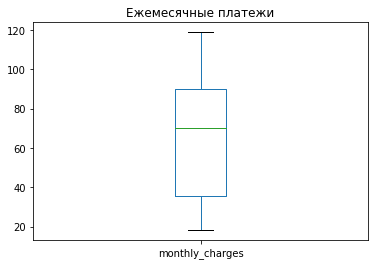

In [565]:
#построим boxplot количественных признаков

data_contr['monthly_charges'].plot(kind='box', title='Ежемесячные платежи',figsize=(6,4));


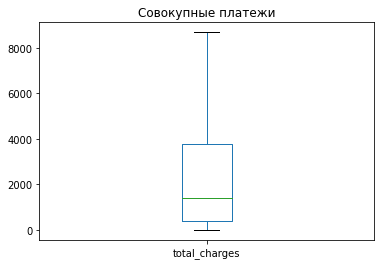

In [566]:
data_contr['total_charges'].plot(kind='box', title='Совокупные платежи', figsize=(6,4));

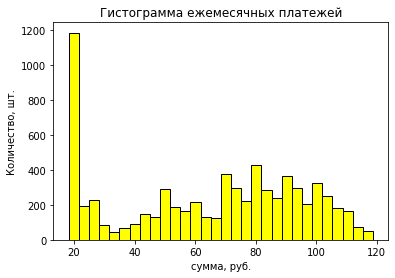

In [567]:
# построим гистограмму распределения данных ежемесячных платежей

plt.hist(data_contr['monthly_charges'], color = 'yellow', edgecolor = 'black',
         bins = 30);
plt.title('Гистограмма ежемесячных платежей')
plt.xlabel('сумма, руб.')
plt.ylabel('Количество, шт.');

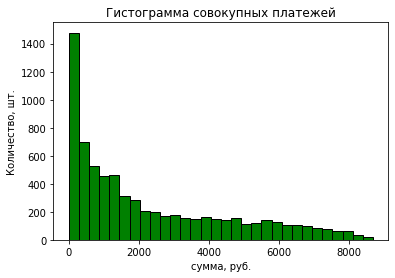

In [568]:
# построим гистограмму распределения данных совокупных платежей

plt.hist(data_contr['total_charges'], color = 'green', edgecolor = 'black',
         bins = 30);
plt.title('Гистограмма совокупных платежей')
plt.xlabel('сумма, руб.')
plt.ylabel('Количество, шт.');

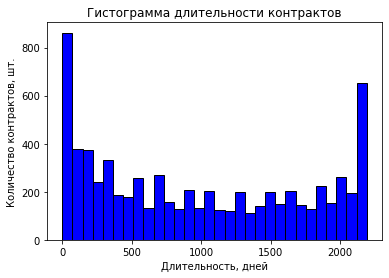

In [569]:
# построим гистограмму распределения данных длительности контрактов

plt.hist(data_contr['contract_duration'], color = 'blue', edgecolor = 'black',
         bins = 30);
plt.title('Гистограмма длительности контрактов')
plt.xlabel('Длительность, дней')
plt.ylabel('Количество контрактов, шт.');

In [570]:
x = data_contr.loc[data_contr['target'] == 1, ['contract_duration']]

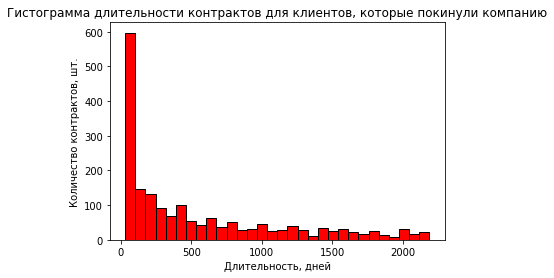

In [571]:
# построим гистограмму распределения данных длительности контрактов для клиентов, которые покинули компанию

plt.hist(x, color = 'red', edgecolor = 'black', bins = 30);
plt.title('Гистограмма длительности контрактов для клиентов, которые покинули компанию')
plt.xlabel('Длительность, дней')
plt.ylabel('Количество контрактов, шт.');

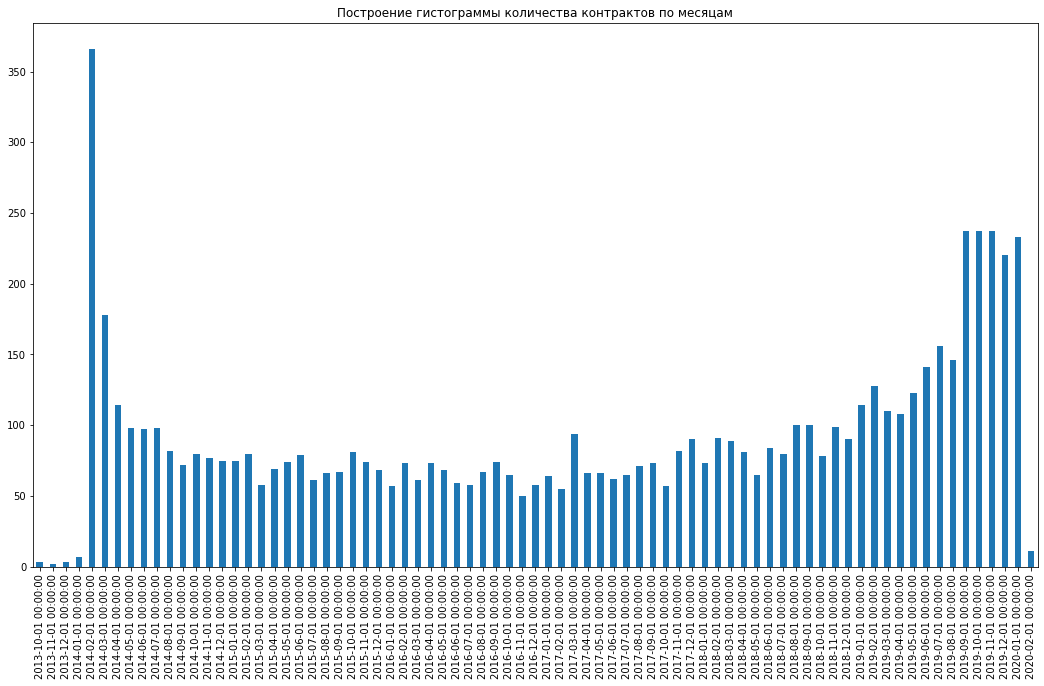

In [572]:
# построим гистограмму распределения контрактов по месяцам

# преобразование столбца 'month_year_begin' в тип datetime
data_contr['month_year_begin'] = data_contr['month_year_begin'].dt.to_timestamp()

# построение гистограммы
data_contr['month_year_begin'].value_counts().sort_index().plot(kind='bar', figsize=(18, 10), 
                                                                title='Построение гистограммы количества контрактов по месяцам');

## Подготовка данных для построения моделей

In [573]:
# объеденим таблицы методом через merge

print(data_contr.shape)
print(data_perso.shape)
print(data_inter.shape)
print(data_phone.shape)
data = data_contr.merge(data_perso, on='customer_id', how='outer')
data = data.merge(data_inter, on='customer_id', how='outer')
data = data.merge(data_phone, on='customer_id', how='outer')
display(data)

(7043, 11)
(7043, 5)
(5517, 8)
(6361, 2)


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_duration,...,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,1036,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,...,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,1990.50,0,730,...,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7362.90,0,2191,...,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,346.45,0,337,...,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,1,123,...,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [574]:
# установим id клиента в качестве индекса

data = data.set_index('customer_id')
data = data.drop('end_date', axis=1)
display(data)

,begin_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target,contract_duration,month_year_begin,gender,...,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,2020-01-01,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,One year,No,Mailed check,56.95,1889.50,0,1036,2017-04-01,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,2019-10-01,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,2016-05-01,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,2019-09-01,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,One year,Yes,Mailed check,84.80,1990.50,0,730,2018-02-01,Male,...,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
2234-XADUH,2014-02-01,One year,Yes,Credit card (automatic),103.20,7362.90,0,2191,2014-02-01,Female,...,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
4801-JZAZL,2019-03-01,Month-to-month,Yes,Electronic check,29.60,346.45,0,337,2019-03-01,Female,...,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN


In [575]:
data = data.drop('begin_date', axis=1)
data = data.drop('month_year_begin', axis=1)

In [576]:
# проверим отсутствие данных в объединенной таблице 

data.isna().sum()

type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
target                  0
contract_duration       0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
dtype: int64

In [577]:
# смотрим количество уникальных значений в колонках с пропусками  

for i in data_inter.columns:
    print(i)
    print()
    print(data_inter[i].value_counts())
    print()

customer_id

3096-GKWEB    1
4446-BZKHU    1
2239-JALAW    1
4815-YOSUK    1
2845-AFFTX    1
             ..
5501-TVMGM    1
1228-ZLNBX    1
1320-GVNHT    1
3982-DQLUS    1
3629-ZNKXA    1
Name: customer_id, Length: 5517, dtype: int64

internet_service

Fiber optic    3096
DSL            2421
Name: internet_service, dtype: int64

online_security

No     3498
Yes    2019
Name: online_security, dtype: int64

online_backup

No     3088
Yes    2429
Name: online_backup, dtype: int64

device_protection

No     3095
Yes    2422
Name: device_protection, dtype: int64

tech_support

No     3473
Yes    2044
Name: tech_support, dtype: int64

streaming_tv

No     2810
Yes    2707
Name: streaming_tv, dtype: int64

streaming_movies

No     2785
Yes    2732
Name: streaming_movies, dtype: int64



In [578]:
# замениям пропуски на "No", тк с высокой долей вероятности пропуски возникли, тк клиенты не пользуются данными услугами

data = data.fillna('No')

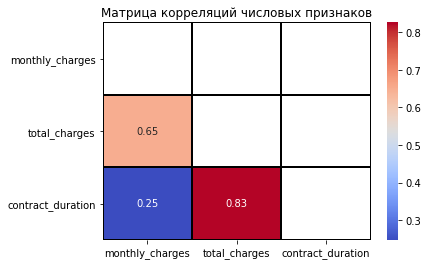

In [579]:
# корреляционный анализ числовых признаков 

data_corr=data[['monthly_charges','total_charges','contract_duration']]
matrix = np.triu(data_corr.corr())
plt.title('Матрица корреляций числовых признаков')
sns.heatmap(data_corr.corr(), annot = True, mask=matrix, cmap= 'coolwarm', linewidths=1, linecolor='black');

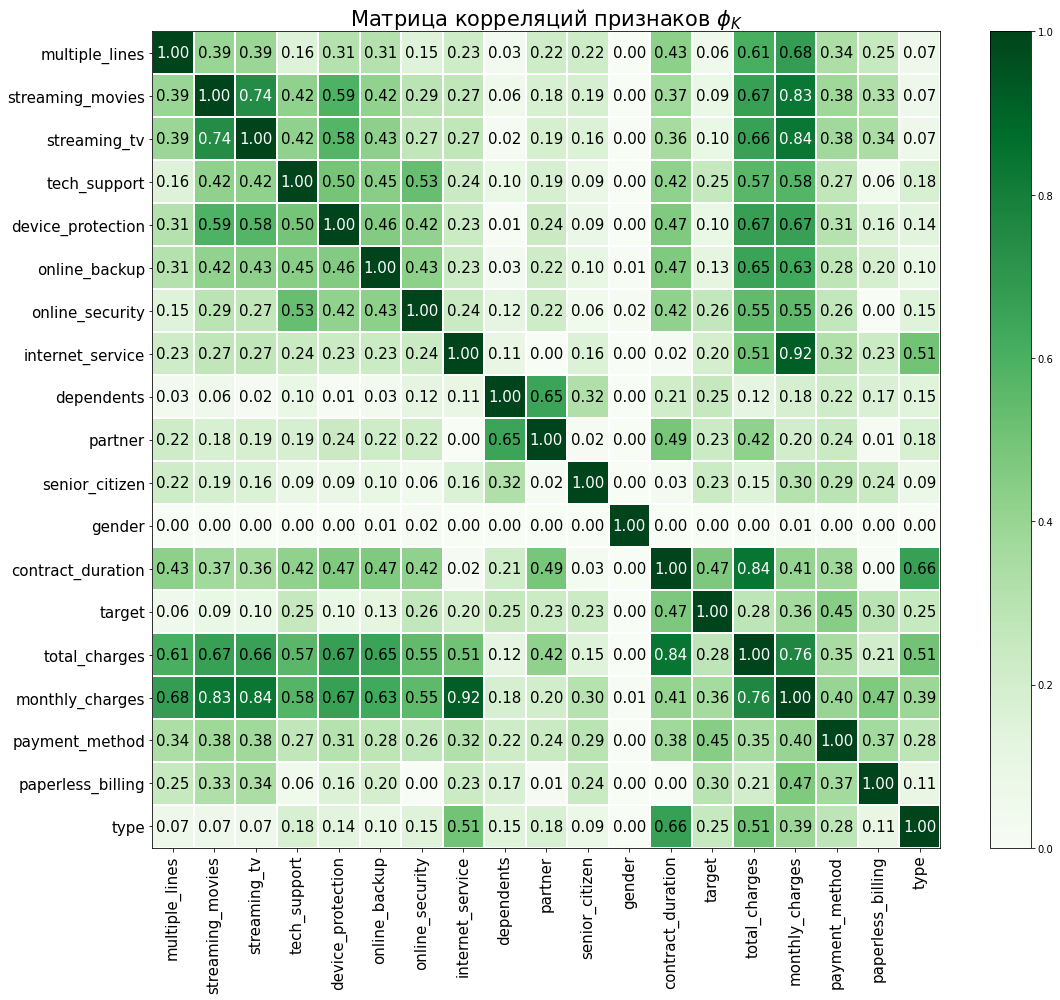

In [580]:
# корреляционный анализ признаков с помощью оператора phik

interval_cols = data_corr
phik_overview = data.phik_matrix(interval_cols=interval_cols)
phik_overview.round(2)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Матрица корреляций признаков $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(16, 14));
plt.tight_layout();

In [581]:
# удаляем признаки с сильной корреляцией (для избежания мультиколлинеарности)

data = data.drop('monthly_charges', axis=1)
# data = data.drop('month_year_begin', axis=1)
# data = data.drop('begin_date', axis=1)

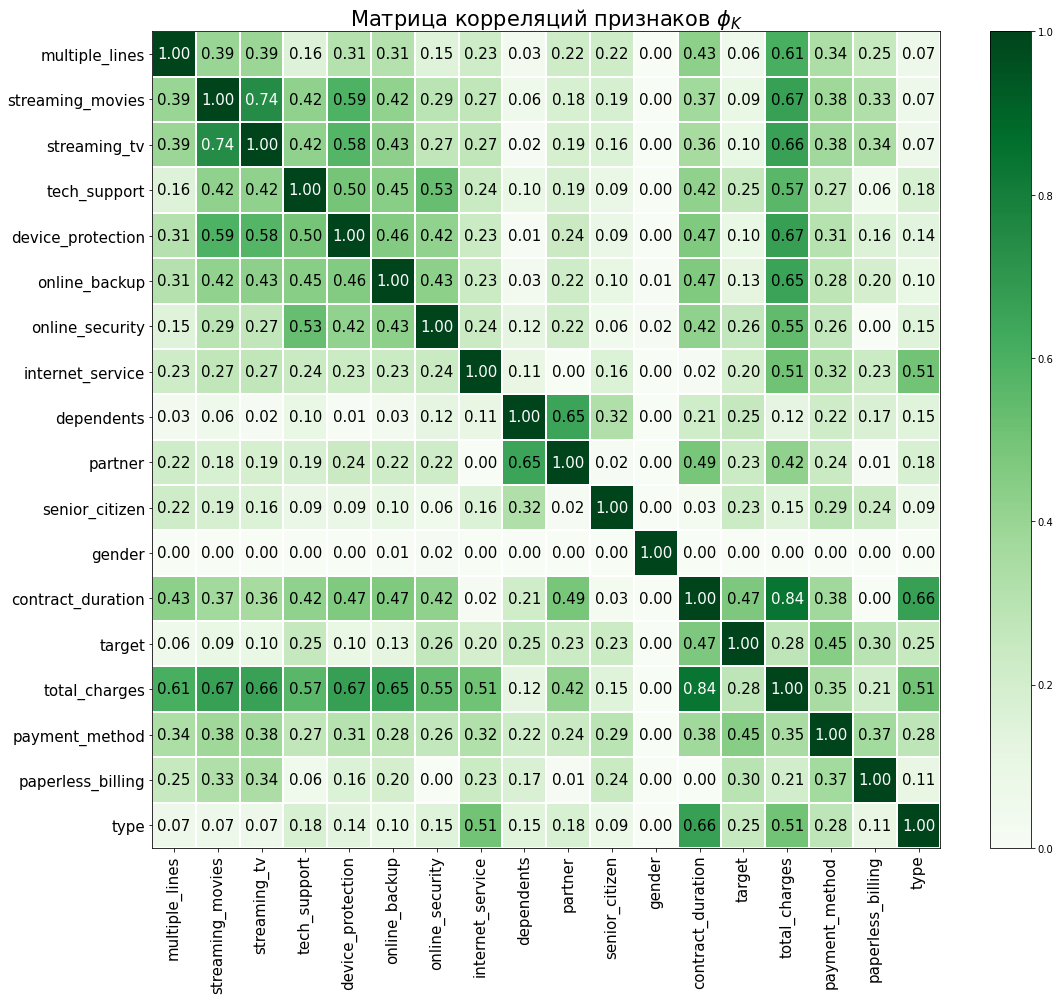

In [582]:
# проверяем корреляцию признаков после удаления

phik_overview = data.phik_matrix(interval_cols=interval_cols)
phik_overview.round(2)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Матрица корреляций признаков $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(16, 14));
plt.tight_layout();

<div class="alert alert-info">
<h2> Предварительный анализ данных<a class="tocSkip"> </h2>

1. Целевым признаком является значения в колонке "end_date" (на мой взгляд, не совсем корректно анализировать именно данный признак. Могу предположить, что у компании есть данные по трафику пользователей)

2. Для анализа нам понадобятся следующие данные:
    - все данные contract.csv кроме "paperless_billing", "payment_method"
    - по файлу personal.csv не хватает описания данных (c gender все ясно). Исходя из наличия описания будет легче принять решение о релевантности данных для анализа.
    - все данные internet.csv
    - нет ясности о каких услугах телефонии идет речь в файле phone.csv. Нужно описание
     
3. Надо будет предобработать данные с датами.
    
4. Пропуски заполнили "0", дубликаты отсутствуют, заголовки переименовали, предварительный анализ данных показал отсутствие явных аномалий.

5. Количество строк в файлах разное. Предварительно планирую провести анализ по двум развилкам: 1. Взять количество строк для самой маленькой таблицы (internet.csv) 2. Взять количество строк из файла contract, если количество отключений при его объединении с файлом internet будет больше ~85%. 
</div>

In [583]:
# проверяем

display(data)

,type,paperless_billing,payment_method,total_charges,target,contract_duration,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
5575-GNVDE,One year,No,Mailed check,1889.50,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,108.15,1,61,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),1840.75,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
9237-HQITU,Month-to-month,Yes,Electronic check,151.65,1,61,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,One year,Yes,Mailed check,1990.50,0,730,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
2234-XADUH,One year,Yes,Credit card (automatic),7362.90,0,2191,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
4801-JZAZL,Month-to-month,Yes,Electronic check,346.45,0,337,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,No


In [585]:
# проверяем

display(data)

,type,paperless_billing,payment_method,total_charges,target,contract_duration,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
5575-GNVDE,One year,No,Mailed check,1889.50,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,108.15,1,61,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),1840.75,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
9237-HQITU,Month-to-month,Yes,Electronic check,151.65,1,61,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,One year,Yes,Mailed check,1990.50,0,730,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
2234-XADUH,One year,Yes,Credit card (automatic),7362.90,0,2191,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
4801-JZAZL,Month-to-month,Yes,Electronic check,346.45,0,337,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,No


In [586]:
# обозначим числовые и категориальные признаки

nums = ['total_charges','contract_duration']
cats = data.drop(['target', 'total_charges', 'contract_duration'], axis=1)

In [587]:
# разделение на обучающую и тестовую выборки

features = data.drop('target', axis=1)
target = data['target']

features_train, features_test, target_train, target_test = train_test_split(
     features, target, test_size=0.25, random_state=RANDOM_STATE, stratify=target)

In [588]:
# смотрим баланс классов у целеового признака до оверсэмплинга

print("До оверсэмплинга: ", Counter(target_train))

До оверсэмплинга:  Counter({0: 3880, 1: 1402})


In [589]:
# увеличиваем количество класса "1" (оверсэмплинг) с использованием функции RandomOverSampler

over = RandomOverSampler(sampling_strategy=1)
features_train, target_train = over.fit_resample(features_train, target_train)

# смотрим баланс классов у целевого признака после оверсэмплинга

print("После оверсэмплинга: ",Counter(target_train))

После оверсэмплинга:  Counter({0: 3880, 1: 3880})


In [593]:
#проверим результат

display(features_train)
print(target_train.value_counts(normalize = 1))

,type,paperless_billing,payment_method,total_charges,contract_duration,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,Month-to-month,Yes,Bank transfer (automatic),2401.05,822,Female,1,No,No,Fiber optic,No,Yes,Yes,No,No,No,Yes
1,Month-to-month,Yes,Electronic check,99.75,92,Male,0,Yes,No,DSL,No,No,No,No,No,Yes,No
2,Month-to-month,Yes,Mailed check,1834.15,883,Male,0,Yes,Yes,DSL,Yes,No,No,No,No,Yes,No
3,Month-to-month,No,Bank transfer (automatic),73.50,31,Female,0,No,No,Fiber optic,No,No,Yes,No,No,No,No
4,One year,No,Mailed check,791.15,1187,Male,0,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7755,Month-to-month,Yes,Mailed check,48.55,30,Male,0,No,No,DSL,Yes,No,No,No,No,No,No
7756,Month-to-month,Yes,Electronic check,88.35,30,Male,0,No,No,Fiber optic,No,No,No,No,Yes,Yes,No
7757,Month-to-month,No,Mailed check,223.45,153,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
7758,Month-to-month,No,Bank transfer (automatic),994.80,457,Female,0,No,Yes,Fiber optic,No,No,No,No,No,No,No


0    0.5
1    0.5
Name: target, dtype: float64


## Построение, обучение, тестирование моделей

In [594]:
# проведем масштабирование количественных признаков

scaler = StandardScaler()
scaler.fit(features_train[nums])
features_train[nums] = scaler.transform(features_train[nums])
features_test[nums] = scaler.transform(features_test[nums])

In [595]:
# переведем категориальные переменные в цифровые (дамми переменные)

features_train = pd.get_dummies(features_train, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

# проверим поменялись ли колонки местами в train и target

for i in range(0,len(features_test.columns)):
    if features_train.columns[i] != features_test.columns[i]:
        print("Заголовки НЕ совпадают")

In [596]:
# проверим

print(features_train.head(3))

   total_charges  contract_duration  senior_citizen  type_One year  \
0       0.157964          -0.035452               1              0   
1      -0.890445          -1.031098               0              0   
2      -0.100300           0.047746               0              0   

   type_Two year  paperless_billing_Yes  \
0              0                      1   
1              0                      1   
2              0                      1   

   payment_method_Credit card (automatic)  payment_method_Electronic check  \
0                                       0                                0   
1                                       0                                1   
2                                       0                                0   

   payment_method_Mailed check  gender_Male  ...  dependents_Yes  \
0                            0            0  ...               0   
1                            0            1  ...               0   
2                            

In [597]:
%%time
# инициализируем модель RandomForestClassifier

rfc = RandomForestClassifier(random_state=RANDOM_STATE)

# определение гиперпараметров для GridSearchCV

param_grid = {
    'n_estimators': [5, 10, 60],
    'max_depth': [1, 3, 7],
    'min_samples_split': [2, 5, 10]
}

# создание GridSearchCV для нахождения лучших гиперпараметров

gscv_rfc = GridSearchCV(rfc, param_grid, cv=5, scoring='roc_auc')

# обучение модели и нахождение лучших гиперпараметров

best_gscv_rfc = gscv_rfc.fit(features_train, target_train)

# оценка качества модели на тестовой выборке

print(f'Лучшие параметры: {best_gscv_rfc.best_params_}')
print(f'Лучшее roc-auc для обучающей выборки: {best_gscv_rfc.best_score_}')

probabilities_test = best_gscv_rfc.predict_proba(features_test)[:,1]
roc_auc_rfc = roc_auc_score(target_test, probabilities_test).round(2)
print('Значение roc-auc для тестовой выборки : ', roc_auc_rfc)

Лучшие параметры: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 60}
Лучшее roc-auc для обучающей выборки: 0.8816339409076418
Значение roc-auc для тестовой выборки :  0.86
CPU times: user 12 s, sys: 100 ms, total: 12.1 s
Wall time: 12.4 s


In [598]:
%%time
# инициализируем модель GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=RANDOM_STATE) 

param_grid={'n_estimators':[10,35],
            'max_depth':[5,7],
            'learning_rate': [0.01,0.04,0.05,0.02],
            'min_samples_leaf':[5], 
            'max_features':[1.0] 
           }

gscv_gbc = GridSearchCV(estimator=gbc, 
                          cv=5, scoring='roc_auc',
                          param_grid=param_grid, 
                          n_jobs=n_jobs)
    
best_gscv_gbc = gscv_gbc.fit(features_train, target_train)

print(f'Лучшие параметры: {best_gscv_gbc.best_params_}')
print(f'Лучшее roc-auc для обучающей выборки: {best_gscv_gbc.best_score_}')
predicted_probalities = best_gscv_gbc.best_estimator_.predict_proba(features_test)[:, 1]
probabilities_test = best_gscv_gbc.predict_proba(features_test)[:,1]
roc_auc_gbc = roc_auc_score(target_test, probabilities_test).round(2)
print('Значение roc-auc для тестовой выборки : ', roc_auc_gbc)

Лучшие параметры: {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 1.0, 'min_samples_leaf': 5, 'n_estimators': 35}
Лучшее roc-auc для обучающей выборки: 0.9137245589329366
Значение roc-auc для тестовой выборки :  0.88
CPU times: user 885 ms, sys: 116 ms, total: 1 s
Wall time: 33.3 s


In [599]:
%%time
# инициализируем модель LogisticRegression

lr = LogisticRegression(solver='lbfgs', n_jobs=-1)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 70]}

gscv_lr = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc')
best_gscv_lr=gscv_lr.fit(features_train, target_train)

print(f'Лучшие параметры: {best_gscv_lr.best_params_}')
print(f'Лучшее roc-auc для обучающей выборки: {best_gscv_lr.best_score_}')

probabilities_test = best_gscv_lr.predict_proba(features_test)[:,1]
roc_auc_lr = roc_auc_score(target_test, probabilities_test).round(2)
print('Значение roc-auc для тестовой выборки : ', roc_auc_lr)

Лучшие параметры: {'C': 70}
Лучшее roc-auc для обучающей выборки: 0.8419641433733659
Значение roc-auc для тестовой выборки :  0.85
CPU times: user 5.69 s, sys: 6.75 s, total: 12.4 s
Wall time: 12.4 s


In [600]:
# выведем сводную таблицу с результатом по всем моделям

result = pd.DataFrame([roc_auc_rfc, roc_auc_gbc, roc_auc_lr], 
                   index=["RandomForestClassifier", "GradientBoostingClassifier", "LogisticRegression"], 
                      columns=["roc-auc"])
display('Сводная таблица с результатом тестирования моделей', result)

'Сводная таблица с результатом тетсирования моделей'

,roc-auc
RandomForestClassifier,0.86
GradientBoostingClassifier,0.88
LogisticRegression,0.85


In [601]:
# проверим результат константной модели

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(features_train,target_train)
dummy_predict = dummy.predict(features_test)
print(dummy.score(features_train,target_train))
predicted_probalities = dummy.predict_proba(features_test)[:, 1]
print("AUC",roc_auc_score(target_test, predicted_probalities))

0.5
AUC 0.5


In [602]:
# создадим функцию для тестирования модели и построения кривой ROC, а также матрицы ишибок

def testing_model(features_test, target_test, model):
    predictions_test = model.predict(features_test)
    probabilities_test = model.predict_proba(features_test)[:,1]
    fpr, tpr, threshold = roc_curve(target_test, probabilities_test)
    plt.figure(figsize=(5, 4))
    f1 = f1_score(target_test, predictions_test)
    roc_auc = roc_auc_score(target_test, probabilities_test)
    
    print('Класс модели: ', type(model).__name__)
    print('F1-мера: ', f1)
    print('roc-auc: ', roc_auc)
    
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_test, pos_label=1)
    plt.plot(fpr, tpr, label=type(model).__name__)
    plt.xlabel('Вероятность ошибки 1-рода')
    plt.ylabel('Recall')
    plt.title('ROC-кривая модели класса ' + type(model).__name__)
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend();
    
    cmatrix = confusion_matrix(target_test, predictions_test)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cmatrix, 
                annot=True,  
                cmap='crest', 
                fmt='d').set(title='Матрица ошибок', xlabel='Предсказания', ylabel='Правильные ответы')
    plt.show();

Класс модели:  GridSearchCV
F1-мера:  0.6642728904847397
roc-auc:  0.8768852453590779


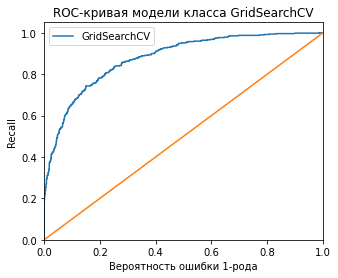

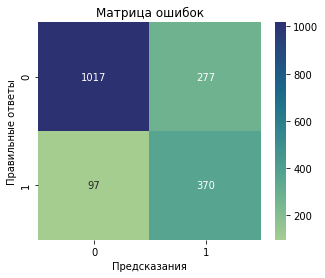

In [603]:
# инициируем функцию тестирования для модели GradientBoostingClassifier

testing_model(features_test, target_test, best_gscv_gbc)

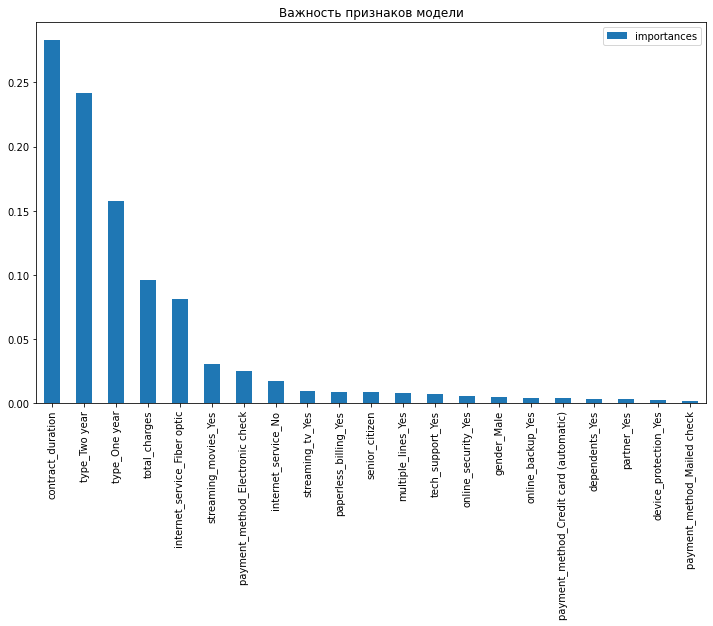

,importances
contract_duration,0.282824
type_Two year,0.242095
type_One year,0.157790
total_charges,0.095516
internet_service_Fiber optic,0.081179
streaming_movies_Yes,0.030667
payment_method_Electronic check,0.024900
internet_service_No,0.017249
streaming_tv_Yes,0.009555
paperless_billing_Yes,0.008795


In [604]:
# выведем признаки в порядке их важности для модели в графичеком и табличном варианте

feature_importances = pd.DataFrame(best_gscv_gbc.best_estimator_.feature_importances_, index = features_test.columns, columns=['importances'])
feature_importances = feature_importances.sort_values(by='importances', ascending=False)
feature_importances.plot(kind='bar', figsize=(12, 7), title='Важность признаков модели')
plt.show()
display(feature_importances.head(10))

<div class="alert alert-info">
<h2> ФИНАЛЬНЫЙ ОТЧЕТ<a class="tocSkip"> </h2>
    
**ПЛАН ОТЧЕТА**

**1. ВЫВОДЫ ПО ОСНОВНЫМ ЭТАПАМ ИССЛЕДОВАНИЯ**
 
1.1. ВВЕДЕНИЕ
    
1.2. ПОДГОТОВКА ДАННЫХ
    
1.3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ
    
1.4. ПОДГОТОВКА ДАННЫХ ДЛЯ ПОСТРОЕНИЯ МОДЕЛИ
    
1.5. ПОСТРОЕНИЕ, ОБУЧЕНИЕ, ТЕТСТИРОВАНИЕ МОДЕЛЕЙ
    
1.6. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ МОДЕЛИ

**2. ОТВЕТЫ НА ВОПРОСЫ**
    
2.1. КАКИЕ ПУНКТЫ ПЛАНА БЫЛИ ВЫПОЛНЕНЫ, А КАКИЕ - НЕТ. ПОЧЕМУ? 
    
2.2. КАКИЕ ТРУДНОСТИ ВОЗНИКЛИ И КАК ВЫ ИХ ПРЕОДОЛЕЛИ? 
    
2.3. КАКИЕ КЛЮЧЕВЫЕ ШАГИ В РЕШЕНИЕ ЗАДАЧИ ВЫ ВЫДЕЛИЛИ? 
    
2.4. КАКИЕ ПРИЗНАКИ ИСПОЛЬЗОВАЛИ ДЛЯ ОБУЧЕНИЯ МОДЕЛИ И КАКАЯ ПРЕДОБРАБОТКА ЭТИХ ПРИЗНАКОВ БЫЛА ВЫПОЛНЕНА?
    
2.5. КАКАЯ ВАША ИТОГОВАЯ МОДЕЛЬ, КАКИЕ У НЕЕ ГИПЕРПАРАМЕТРЫ И КАКОЕ КАЧЕСТВО (ОСНОВНАЯ И ДОПОЛНИТЕЛЬНАЯ МЕТРИКИ)?   



**1. ВЫВОДЫ ПО ОСНОВНЫМ ЭТАПАМ ИССЛЕДОВАНИЯ**    
    
**1.1. ВВЕДЕНИЕ**
    
Целью проекта является решение задачи бинарной классификации и определение вероятности оттока клиентов в компании «Ниединогоразрыва.ком». Важно также определить степень влияния признаков на лояльность клиентов. 
Целевым признаком является колонка "EndDate". Требования к модели: ROC-AUC>0.85, test size = 0.25, RANDOM_STATE=040723.    
    
**1.2.	ПОДГОТОВКА ДАННЫХ**
        

•	df_contract.csv;
    
•	df_internet.csv;
    
•	df_personal.csv;
    
•	df_phone.csv.
    
Максимальное количество строк представлено в БД df_contract и df_personal (7043 строки ) и 5517  строк - в БД  df_internet.csv. Наличие пропусков в данных скорее всего связано с отсутствием услуг у клиентов.
В ходе предварительной обработки данных решили следующие задачи: 
    
- Создали колонку с бинарным целевым признаком (1-0);
- Для удобства переименовали заголовки в таблицах;
- Поменяли типы данных в колонках total_charges (на “float”), begin_date (на “datetime”), end_date (на “datetime”);
- В колонке end_date значение “No” поменяли на дату “2020-02-01”, когда была выгружена БД;
- Создали колонку “contract_duration”, в которой рассчитали длительность контрактов в днях;
    
**1.3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ**
    
В ходе исследовательского анализа данных можно отметить следующее:
- Отсутствуют статистические выбросы в данных. Данные выглядят подготовленными.
- Совокупные платежи смещены влево, тогда как ежемесячные платежи смещены вправо относительно медианы. 50% совокупныз платежей проходит на сумы меньше 1800 руб.
- Высокая доля совокупных платежей (~10%) проходит до 300 руб.
- Длительность контрактов имеет равномерное распределение за исключением крайних точек: высокая доля контрактов действует менее полугода (~10%), 5% контрактов действую более 7 лет.
- У 50% клиентов, которые покинули компанию, контракт действовал менее 1 года.
- За последние 2 года видим ежемесячное увеличение количество заключаемых контрактов. Особенно резко их число увеличилось в конце 2019 – начале 2020 гг.
    
**1.4. ПОДГОТОВКА ДАННЫХ ДЛЯ ПОСТРОЕНИЯ МОДЕЛИ**
 
- Для удобства анализа все таблицы объединили в одну. 
- Создали колонку с бинарным целевым признаком (1-0).
- Корреляционный анализ выявил связь признака «monthly_charges» с другими. Удалили. Также удалили все признаки с датой.
- Имеет место дисбаланс классов {0: 3880, 1: 1402}. Увеличили количество классов "1" (оверсэмплинг) с использованием функции RandomOverSampler. Количество классов после ресэмплирования:{0: 3880, 1: 3880}.
- Создали обучающую и тренировочные выборки (пропорция 1:3).


**1.5. ПОСТРОЕНИЕ, ОБУЧЕНИЕ, ТЕТСТИРОВАНИЕ МОДЕЛЕЙ**

- Использовали три модели (RandomForestClassifier, GradientBoostingClassifier, LogisticRegression) для поиска лучшего результата обучения. Модели имеют разные алгоритмы поиска решений. Рассмотрим, какая из них даст лучший результат.
- Провели масштабирование количественных признаков.
- Перевели категориальные переменные в цифровые (дамми переменные). Проверили, чтобы колонки не поменялись местами в тренировочной и тестовой выборках.
- В процессе обучения получили следующие значения roc-auc:
    
RandomForestClassifier	0.86
    
GradientBoostingClassifier	0.88
    
LogisticRegression	0.85
    

Лучший результат roc-auc на тестовой выборке показала модель GradientBoostingClassifier с гиперпараметрами: 
    
- learning_rate - 0.05, 
    
- max_depth - 7, 
    
- max_features - 1.0, 
    
- min_samples_leaf - 5,
    
- n_estimators - 35.

Результа roc-auc на константной модели равен 0.5.
 
Тестирование модели GradientBoostingClassifier показало следующее:

- Кривая roc-auc имеет симметричную полукруглую форму выше диагонали.
    
- Матрица ошибок представлена следующим образом:
    
    - истинно позитивных значений - 372 шт.
    
    - истинно негативных значений - 1016 шт.
    
    - ошибочно позитивных значений - 278 шт. 
    
    - ошибочно негативных значений - 95 шт. 

Модель можно охарактеризовать "агрессивной", тк ошибочно позитивных значений в 3 раза больше ошибочно негативных значений. Модель работает по принципу "лучше перебдеть, чем не добдеть", то есть модель перестраховывается в части оценки вероятности риска ухода клиента. Данная ситуация может раздуть маркетинговый бюджет, поэтому нужно провести дополнительное исследование, которое позволит оценить финансовый результат от маркетинговой компании по удержанию клиентов (либо стоимсоти потери клиента).
    
**1.6. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ МОДЕЛИ**

Топ-10 признаков, оказывающих на модель наибольшее влияние:

- contract_duration	0.36
    
- type_Two year	0.15
    
- internet_service_Fiber optic	0.11
    
- type_One year	0.11
    
- total_charges	0.10
    
- internet_service_No	0.025
    
- payment_method_Electronic check	0.02
    
- streaming_movies_Yes	0.019
    
- paperless_billing_Yes	0.011
    
- senior_citizen	0.009 
    
   
На лояльность клиентов в первую очередь влияет время использования услуг. Чем дольше клиент пользуется услугами компании, тем меньше вероятность, что он оттуда уйдет. Тип олаты оказывает значительное влияние на лояльность. Действительно, если клиент делает длительный платеж, то больше веороятность, что он останется и не будет изучать рынок каждый месяц на предмет поиска других контрагентов. ОВ кабель также влияет на лояльность клиента. Благодяря ему, связь устойчива и у клиента возникает меньше нареканий к сервису. Далее, по убывающей...

Нами была построена модель, которая определяет вероятность ухода клиентов из компании. Также определили важность признаков, которые дают наибольшее влияние на лояльность клиентов.
    
**2. ОТВЕТЫ НА ВОПРОСЫ**

    
**2.1. КАКИЕ ПУНКТЫ ПЛАНА БЫЛИ ВЫПОЛНЕНЫ, А КАКИЕ - НЕТ. ПОЧЕМУ?**
    
    
Все пункты плана были выполнены в установленной последовательности (см выше комментарии по каждому пункту плана).
    
**2.2. КАКИЕ ТРУДНОСТИ ВОЗНИКЛИ И КАК ВЫ ИХ ПРЕОДОЛЕЛИ?**
    
Трудности, с которыми столкнулись:
 
- Трудность 1: потеря данных при объединении таблиц. Решение: заполнение пропусков значением "No", тк пропуски возникли по причини отсутствия подключенных услуг у клиентов.

- Трудность 2: мультиколлинеарность признаков. Решение: построение матрицы корреляции признаков и удаление признаков с датами, а также признаков с высокой корреляцией (более 0.80).

- Трудность 3: дисбаланс классов в целевом признаке. Решение: увеличиваем количество класса "1" (оверсэмплинг) с использованием функции RandomOverSampler.
    
- Трудность 4: высокая дисперсия между значениями цифровых признаков. Решение: масштабируем количественные признаки с помощью функции StandardScaler().
    
- Трудность 5: наличие категориальных переменных типа object. Решение: переводим категориальные переменные в цифровые (дамми переменные).
    
**2.3. КАКИЕ КЛЮЧЕВЫЕ ШАГИ В РЕШЕНИЕ ЗАДАЧИ ВЫ ВЫДЕЛИЛИ?**
    
Ключевые шаги отражены в плане выполнения работ. Из наиболее трудоемких я бы выделили два: 
    
- Подготовка данных для обучения и тестирования моделей;
- Поиск гиперпараметров для лучшего показателя roc-auc.
    
**2.4. КАКИЕ ПРИЗНАКИ ИСПОЛЬЗОВАЛИ ДЛЯ ОБУЧЕНИЯ МОДЕЛИ И КАКАЯ ПРЕДОБРАБОТКА ЭТИХ ПРИЗНАКОВ БЫЛА ВЫПОЛНЕНА?**
    
Топ-10 признаков, оказывающих на модель наибольшее влияние:

- contract_duration	0.36
    
- type_Two year	0.15
    
- internet_service_Fiber optic	0.11
    
- type_One year	0.11
    
- total_charges	0.10
    
- internet_service_No	0.025
    
- payment_method_Electronic check	0.02
    
- streaming_movies_Yes	0.019
    
- paperless_billing_Yes	0.011
    
- senior_citizen	0.009 
    
В качестве предобработки данных была проделана следующая работа: заполнили пропуски значений, масштабировали цифровые признаки, сбалансировали классы в целевом признаке, удалили признаки с высокой корреляцией, заменили категориальные признаки на цифровые. 
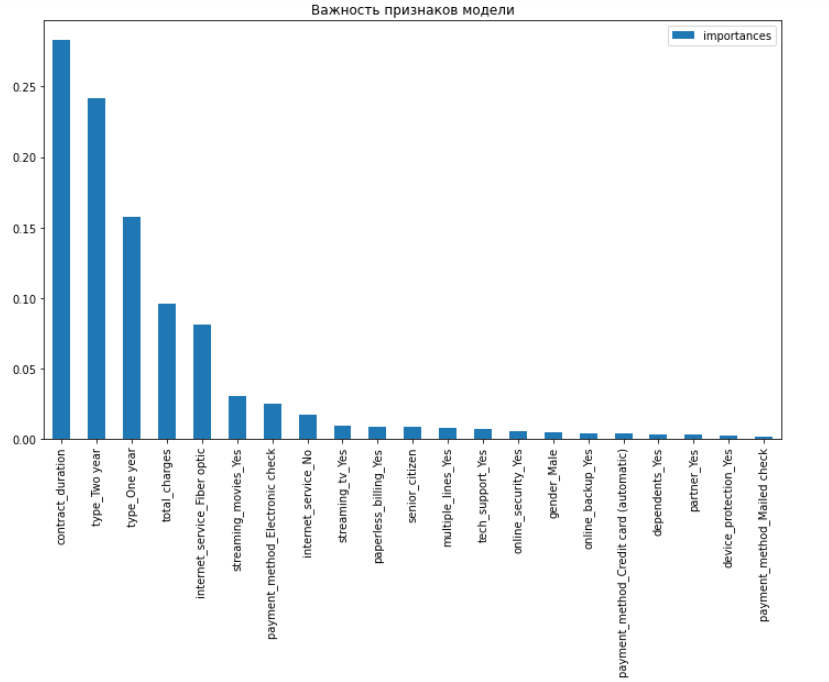

**2.5. КАКАЯ ВАША ИТОГОВАЯ МОДЕЛЬ, КАКИЕ У НЕЕ ГИПЕРПАРАМЕТРЫ И КАКОЕ КАЧЕСТВО (ОСНОВНАЯ И ДОПОЛНИТЕЛЬНАЯ МЕТРИКИ)?**  

Лучший результат roc-auc = 0.88 и F1 = 0.66 на тестовой выборке показала модель GradientBoostingClassifier с гиперпараметрами: 
    
- learning_rate - 0.05, 
    
- max_depth - 7, 
    
- max_features - 1.0, 
    
- min_samples_leaf - 5,
    
- n_estimators - 35.

</div>